# 1. Phase d'idéation

Début de la phase d'idéation par une analyse exploratoire (EDA) du dataset.

Les points analysés sont les suivants :
- Présence des valeurs manquantes
- Types de variables présentes

In [1]:
import pandas as pd

# Chargement des fichiers train et test
train_df = pd.read_csv("data/train.csv")
test_df = pd.read_csv("data/test.csv")

# Aperçu du dataset
print(f"Shape : {train_df.shape}")
train_df.head()


Shape : (1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 1.1 Analyse des valeurs manquantes

Nous identifions les colonnes avec des valeurs manquantes pour préparer un futur traitement des données (imputation ou suppression).


In [2]:
# Aperçu initial des données
print("1.1 Analyse des valeurs manquantes")

train_overview = {
    "shape": train_df.shape,
    "columns": train_df.columns.tolist(),
    "missing_values": train_df.isnull().sum().sort_values(ascending=False).head(20),
    "data_types": train_df.dtypes.value_counts(),
    "target_description": train_df['SalePrice'].describe()
}

print("Top 20 colonnes avec valeurs manquantes :")
print(train_df.isnull().sum().sort_values(ascending=False).head(20))

train_overview

1.1 Analyse des valeurs manquantes
Top 20 colonnes avec valeurs manquantes :
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageQual        81
GarageFinish      81
GarageType        81
GarageYrBlt       81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtCond          37
BsmtQual          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Condition2         0
dtype: int64


{'shape': (1460, 81),
 'columns': ['Id',
  'MSSubClass',
  'MSZoning',
  'LotFrontage',
  'LotArea',
  'Street',
  'Alley',
  'LotShape',
  'LandContour',
  'Utilities',
  'LotConfig',
  'LandSlope',
  'Neighborhood',
  'Condition1',
  'Condition2',
  'BldgType',
  'HouseStyle',
  'OverallQual',
  'OverallCond',
  'YearBuilt',
  'YearRemodAdd',
  'RoofStyle',
  'RoofMatl',
  'Exterior1st',
  'Exterior2nd',
  'MasVnrType',
  'MasVnrArea',
  'ExterQual',
  'ExterCond',
  'Foundation',
  'BsmtQual',
  'BsmtCond',
  'BsmtExposure',
  'BsmtFinType1',
  'BsmtFinSF1',
  'BsmtFinType2',
  'BsmtFinSF2',
  'BsmtUnfSF',
  'TotalBsmtSF',
  'Heating',
  'HeatingQC',
  'CentralAir',
  'Electrical',
  '1stFlrSF',
  '2ndFlrSF',
  'LowQualFinSF',
  'GrLivArea',
  'BsmtFullBath',
  'BsmtHalfBath',
  'FullBath',
  'HalfBath',
  'BedroomAbvGr',
  'KitchenAbvGr',
  'KitchenQual',
  'TotRmsAbvGrd',
  'Functional',
  'Fireplaces',
  'FireplaceQu',
  'GarageType',
  'GarageYrBlt',
  'GarageFinish',
  'GarageC

## 1.1.1 Netttoyage des données

In [3]:
# Nettoyage des données manquantes
df = train_df.copy()

cols_none = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 
             'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
             'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
             'BsmtFinType2', 'MasVnrType']
df[cols_none] = df[cols_none].fillna('None')

cols_median = ['LotFrontage', 'GarageYrBlt', 'MasVnrArea', 'GarageCars', 'GarageArea']
for col in cols_median:
    df[col] = df[col].fillna(df[col].median())

df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])


## 1.2 Types de variables

Nous comptons le nombre de variables de type numérique (`int`, `float`) et catégoriel (`object`).

In [4]:
print("1.2 Types de variables")

df.dtypes.value_counts()

1.2 Types de variables


object     43
int64      35
float64     3
Name: count, dtype: int64

---

# 1.3 Analyse de la distribution de la cible `SalePrice`

La variable cible `SalePrice` est la valeur que nous voulons prédire.
Analysons sa distribution pour comprendre sa répartition, la présence de skewness (asymétrie) ou d'outliers éventuels.


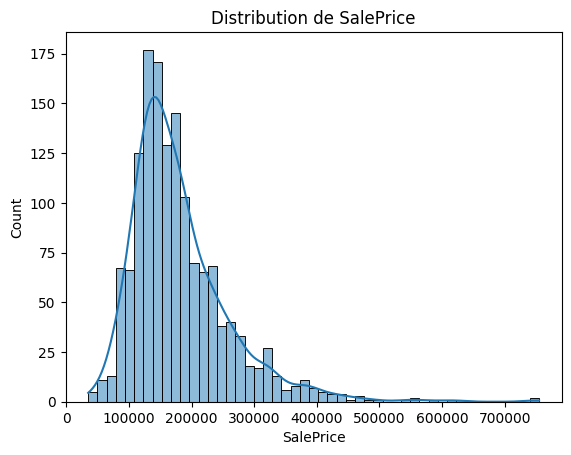

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['SalePrice'], kde=True)
plt.title("Distribution de SalePrice")
plt.show()


## 1.3.1 Test de Shapiro-Wilk

Shapiro-Wilk test statistic: 0.8697
p-value: 0.0000
Avec α = 0.05, on rejette l'hypothèse nulle : la distribution n'est pas normale.


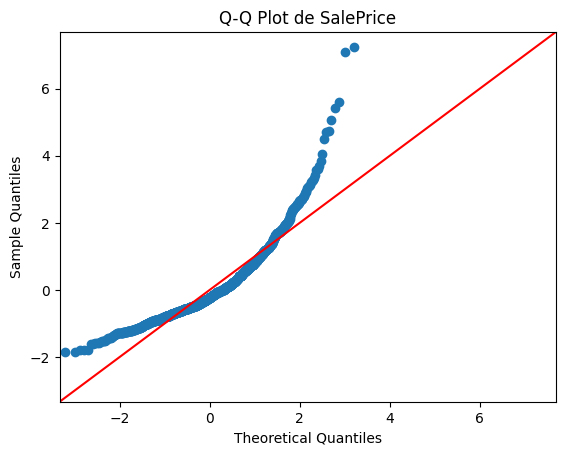

In [6]:
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt

# Test de Shapiro-Wilk
alpha = 0.05
W, p = stats.shapiro(df['SalePrice'])

print(f"Shapiro-Wilk test statistic: {W:.4f}")
print(f"p-value: {p:.4f}")

if p < alpha:
    print(f"Avec α = {alpha}, on rejette l'hypothèse nulle : la distribution n'est pas normale.")
else:
    print(f"Avec α = {alpha}, on ne rejette pas l'hypothèse nulle : la distribution semble normale.")

# Affichage du Q-Q plot
qqplot(df['SalePrice'], dist=stats.norm, fit=True, line='45')
plt.title("Q-Q Plot de SalePrice")
plt.show()


Le prix de vente n’est pas distribué de façon normale, ce qui signifie que l’on a une concentration de maisons autour d’un certain prix médian avec quelques biens très chers. Cela confirme qu’une transformation (ex: log) pourrait stabiliser la variance pour la modélisation.

## 1.3.2 Observations sur `SalePrice`


L’analyse de la distribution de la variable cible SalePrice, qui représente le prix de vente final des maisons, révèle plusieurs éléments importants :

La distribution est asymétrique à droite (right-skewed), ce qui signifie que la majorité des maisons sont vendues à un prix relativement bas à modéré, tandis qu’un petit nombre de biens atteignent des prix très élevés. Ainsi, on remarque visuellement une longue « queue » sur la droite de l’histogramme. La plupart des transactions de vente se situent dans une plage de 100 000 € à 250 000 €, ce qui semble correspondre au cœur du marché résidentiel local. On peut observer un pic de vente autour de 150 000 €, ce qui pourrait correspondre à un prix standard (maisons de taille moyenne avec prestations classiques).

Par contre, on peut remarquer que certaines maisons sont vendues à plus de 500 000 €, voire plus de 700 000 €. Ces valeurs extrêmes, bien que rares, peuvent influencer négativement les modèles statistiques si elles ne sont pas traitées correctement. Ces outliers méritent donc une attention particulière en phase de modélisation.

Cette asymétrie est importante à considérer pour les modèles de machine learning, en particulier ceux qui supposent une distribution gaussienne (comme la régression linéaire, qui fonctionne mieux avec des résidus normalement distribués). Une transformation logarithmique de SalePrice (par exemple via log1p(SalePrice)) est souvent pratiquée pour réduire la skewness (asymétrie), car il faut éviter que le modèle soit trop influencé par les maisons très (trop ?) chères du dataset. 

Pour corriger cette asymétrie, on peut envisager de transformer les prix avec une fonction logarithmique, comme log(SalePrice). Pourquoi utiliser le logarithme ? Car il permet de réduire l’impact des maisons très chères (les très grands prix sont "compressés", ce qui équilibre un peu mieux la distribution), de stabiliser la variance (les différences de prix sont ramenées à des écarts relatifs plus homogènes), et d'améliorer les relations entre variables (les liens entre les caractéristiques (surface, qualité, etc.) et le prix sont souvent plus linéaires après transformation, ce qui aide le modèle à mieux apprendre). Il faudra y penser lors des prochaines étapes.


---

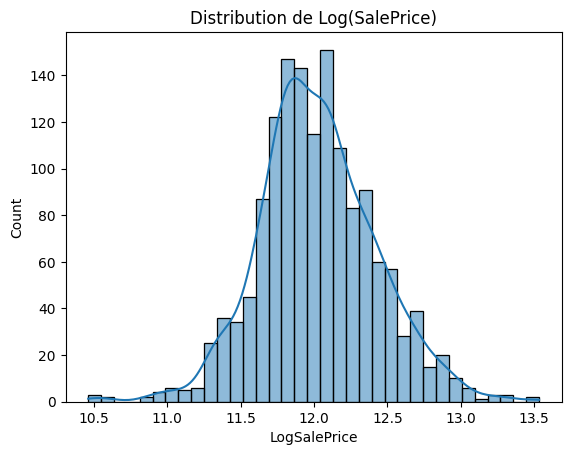

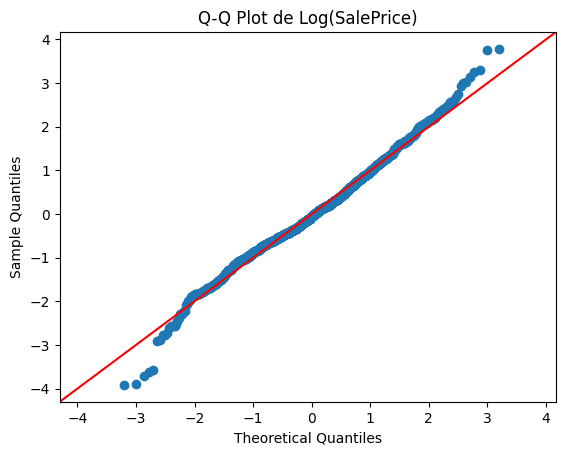

In [7]:
import numpy as np

df['LogSalePrice'] = np.log1p(df['SalePrice'])  # Transformation log

# Visualisation
sns.histplot(df['LogSalePrice'], kde=True)
plt.title("Distribution de Log(SalePrice)")
plt.show()

from statsmodels.graphics.gofplots import qqplot
from scipy import stats
qqplot(df['LogSalePrice'], dist=stats.norm, fit=True, line='45')
plt.title("Q-Q Plot de Log(SalePrice)")
plt.show()


## 1.3.3 Transformation logarithmique
Après transformation logarithmique, la distribution du prix semble plus symétrique et plus proche de la normale. Cette version transformée sera utilisée comme variable cible (target) dans nos modèles.

# 1.4 Corrélations principales avec SalePrice

Nous analysons ici les corrélations entre `SalePrice` (le prix de vente brut) et les variables numériques du jeu de données.

Cette analyse permet d’identifier les variables qui entretiennent les liens linéaires les plus forts avec le prix d’une maison, ce qui est utile pour orienter la sélection des features dans les futurs modèles de prédiction.

Cependant, comme `SalePrice` présente une forte asymétrie, il est également pertinent de comparer ces résultats à ceux obtenus avec une version transformée du prix (`LogSalePrice`), mieux adaptée aux modèles linéaires classiques.

Nous afficherons donc les deux types de corrélation :
- Avec le prix brut (`SalePrice`) — utile pour l’interprétation métier.
- Avec le prix transformé (`LogSalePrice`) — utile pour les modèles de régression.


In [8]:
# Corrélations avec SalePrice (brut)
print("Top corrélations avec SalePrice (prix brut)")
print(df.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False).head(10))

# Corrélations avec LogSalePrice (pour modélisation)
print("\nTop corrélations avec LogSalePrice (log transformé)")
print(df.corr(numeric_only=True)['LogSalePrice'].sort_values(ascending=False).head(10))


Top corrélations avec SalePrice (prix brut)
SalePrice       1.000000
LogSalePrice    0.948374
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
Name: SalePrice, dtype: float64

Top corrélations avec LogSalePrice (log transformé)
LogSalePrice    1.000000
SalePrice       0.948374
OverallQual     0.817185
GrLivArea       0.700927
GarageCars      0.680625
GarageArea      0.650888
TotalBsmtSF     0.612134
1stFlrSF        0.596981
FullBath        0.594771
YearBuilt       0.586570
Name: LogSalePrice, dtype: float64


## 1.4.1 Observations sur les corrélations

### Corrélation avec SalePrice (prix brut)

Les résultats confirment que la variable OverallQual (qualité générale de la maison) est celle qui entretient la plus forte corrélation avec SalePrice. Cela montre que l’évaluation qualitative d’un bien par un professionnel impacte significativement sa valeur.

On retrouve ensuite GrLivArea (surface habitable hors sous-sol), GarageCars et GarageArea, qui représentent respectivement la capacité de stationnement et la taille du garage. Cela suggère qu’un espace de vie plus grand et des équipements pratiques augmentent nettement la valeur perçue d’une maison.

D’autres variables comme TotalBsmtSF et 1stFlrSF (superficies du sous-sol et du rez-de-chaussée), FullBath et TotRmsAbvGrd (nombre de salles de bains et de pièces au-dessus du sol) indiquent également qu’un espace global plus vaste est un facteur de valorisation.

### Corrélation avec LogSalePrice (prix transformé)

La transformation logarithmique du prix permet de lisser la distribution et d’atténuer l’influence des valeurs extrêmes. Cela améliore la linéarité des relations entre les variables numériques et la cible, ce qui est particulièrement utile pour la régression.

Les variables les plus corrélées restent globalement les mêmes, mais certaines voient leur influence renforcée. Par exemple, OverallQual voit sa corrélation augmenter légèrement. GarageCars, GarageArea et FullBath se confirment comme des indicateurs importants.

YearBuilt (année de construction) gagne aussi en importance dans cette version transformée, ce qui indique que l’ancienneté du logement influence davantage le prix de façon relative que brute.

### Conclusion

Les variables comme OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, FullBath et YearBuilt ressortent comme des facteurs prédictifs essentiels. Elles seront de bons candidats pour constituer un premier modèle de régression linéaire. L’utilisation de LogSalePrice comme cible est justifiée par sa distribution plus symétrique et ses corrélations plus stables avec les features.


---

# 1.5 Analyse des principales variables numériques

Nous visualisons la relation entre `LogSalePrice` et les principales variables numériques identifiées précédemment.
Cela permet de mieux comprendre leur impact et de détecter d’éventuelles non-linéarités.


4. Analyse des principales variables numériques avec LogSalePrice


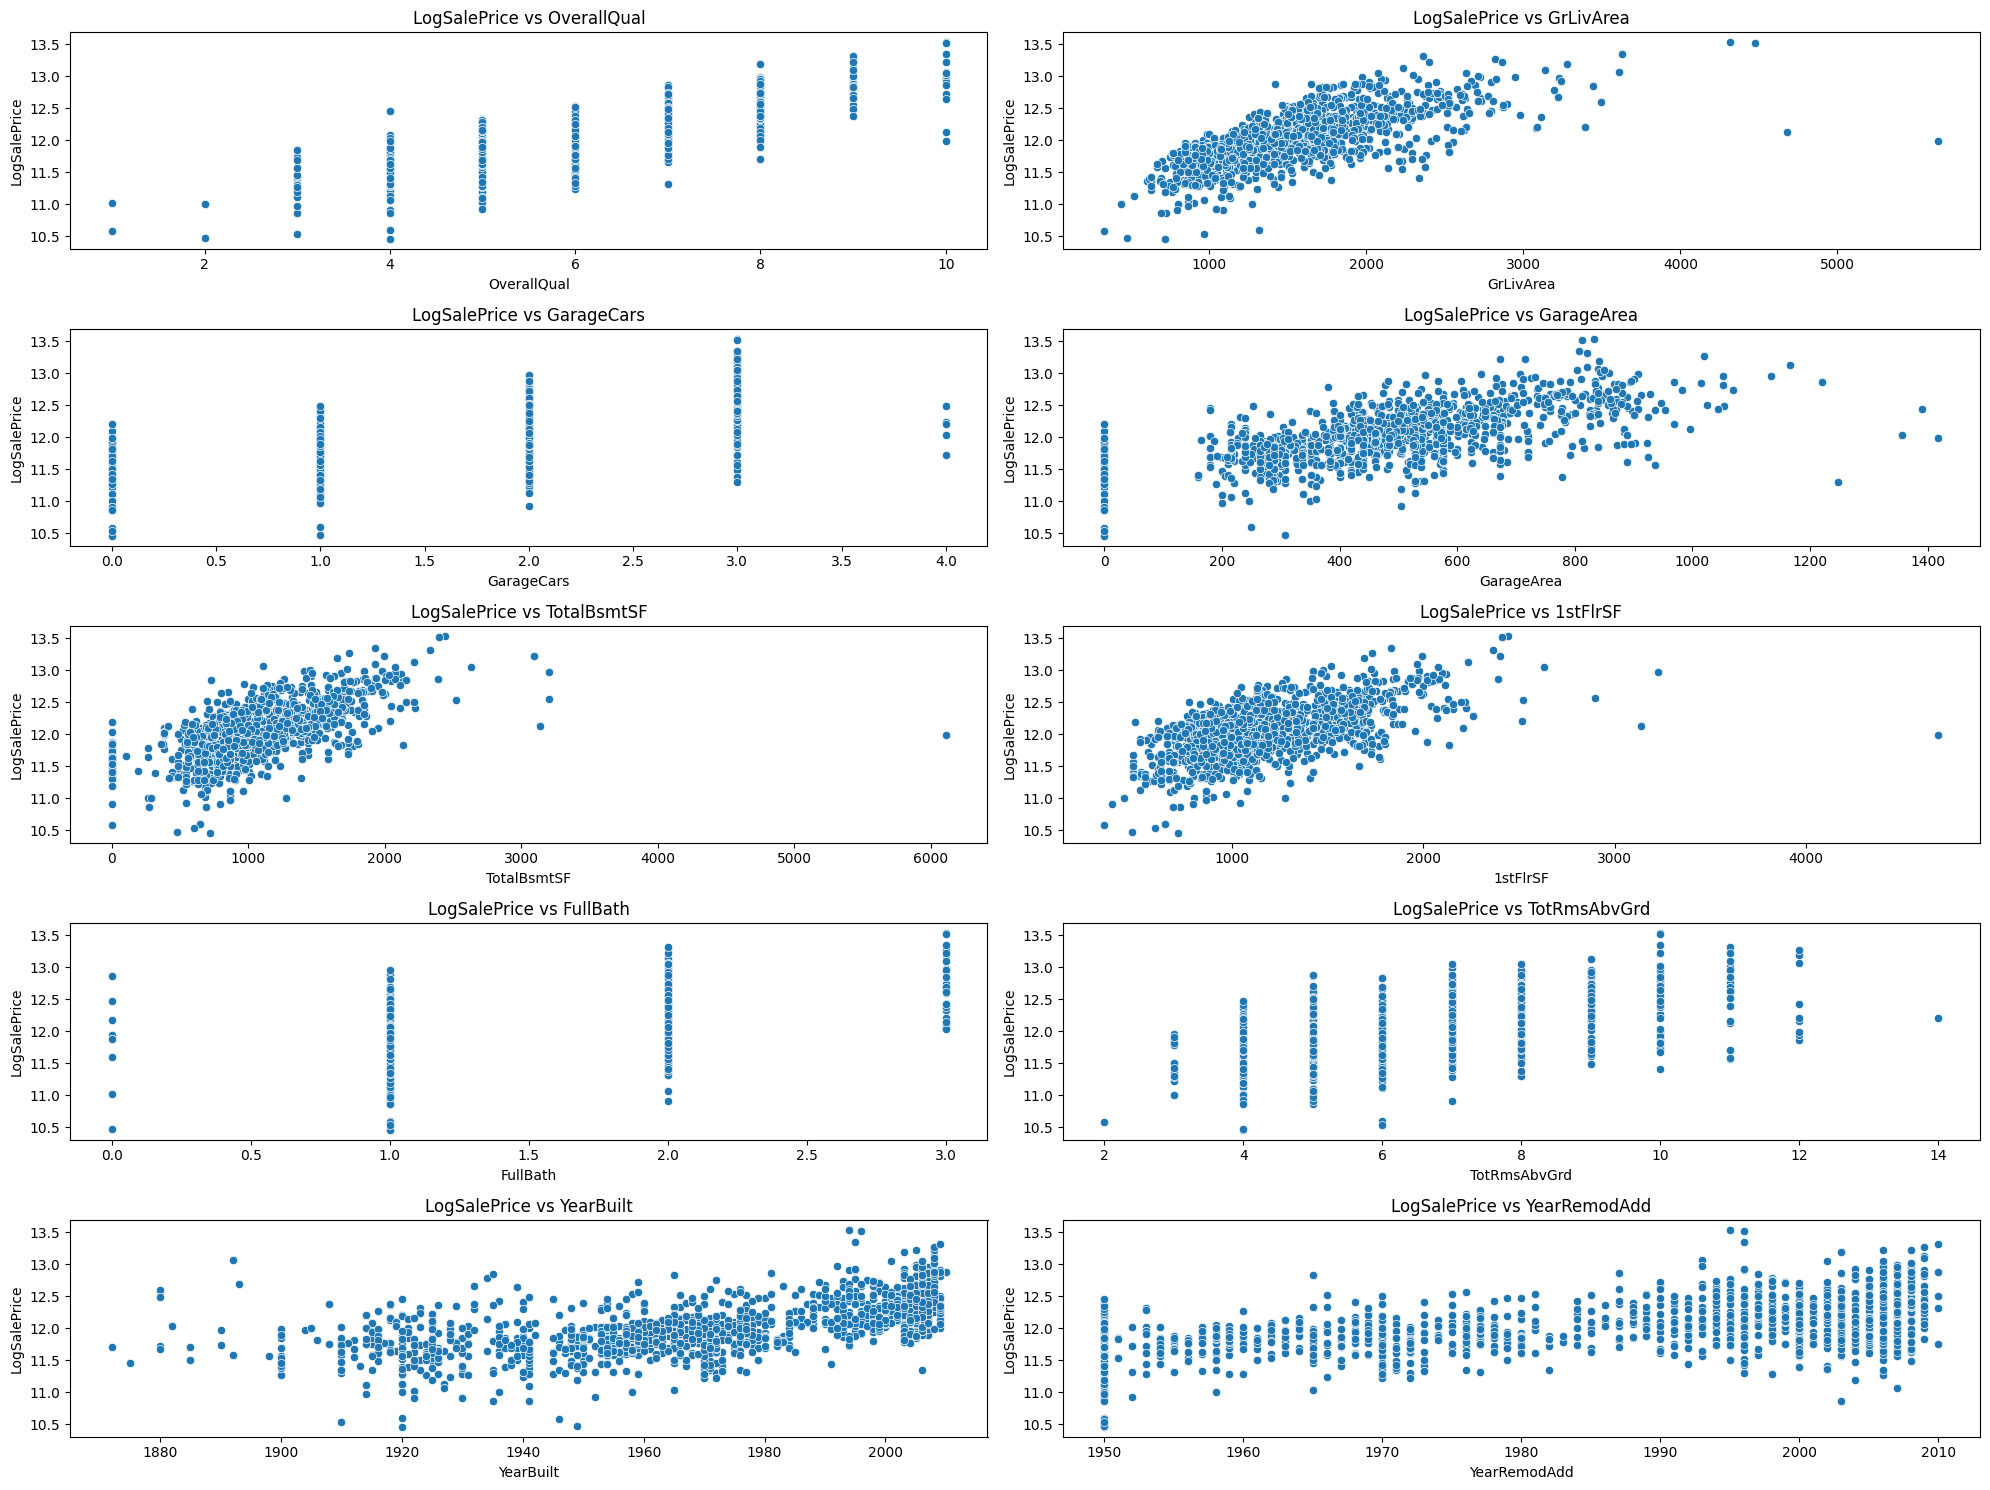

In [9]:
print("4. Analyse des principales variables numériques avec LogSalePrice")

num_vars = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 
            'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 
            'YearBuilt', 'YearRemodAdd']

plt.figure(figsize=(20, 15))
for i, var in enumerate(num_vars):
    plt.subplot(5, 2, i+1)
    sns.scatterplot(x=df[var], y=df['LogSalePrice'])
    plt.title(f'LogSalePrice vs {var}')
plt.tight_layout()
plt.show()

## 1.5.1 Observations sur les variables numériques

- La variable OverallQual (qualité globale) conserve une relation très claire avec LogSalePrice. On observe une tendance linéaire bien définie : chaque point supplémentaire sur cette échelle semble correspondre à une augmentation notable du prix logarithmique.
  
- GrLivArea (surface habitable) montre également une relation croissante bien visible. Les outliers extrêmes sont moins marqués qu’avec SalePrice brut, ce qui rend cette variable encore plus exploitable pour une régression linéaire.

- GarageCars et GarageArea suivent une relation positive : au-delà de 3 voitures, l'effet sur le prix semble se stabiliser, ce qui indique un potentiel effet plafond.

- TotalBsmtSF et 1stFlrSF (surfaces du sous-sol et du rez-de-chaussée) conservent une influence croissante logique, avec une bonne répartition des points autour d’une tendance générale linéaire.

- FullBath et TotRmsAbvGrd sont aussi positivement liés, mais l'effet est plus discret et semble présenter des regroupements par paliers (effet discret d’unité supplémentaire plutôt que variation continue).

- Les variables temporelles YearBuilt et YearRemodAdd indiquent que les maisons plus récentes ou rénovées sont généralement mieux valorisées. L’effet reste linéaire, mais plus diffus, probablement parce que d’autres variables structurelles jouent aussi un rôle dans la valorisation.

➡️ Ces observations renforcent la sélection de variables pour notre futur modèle baseline. Le passage au logarithme améliore la lisibilité des relations et rend le modèle plus adapté à une approche linéaire.


# 1.6 Analyse des principales variables catégorielles

Nous analysons les variables catégorielles les plus prometteuses en fonction de leur relation avec `SalePrice`.
Les variables sélectionnées sont issues de notre compréhension métier et de l'exploration initiale.

5. Analyse des principales variables catégorielles avec LogSalePrice


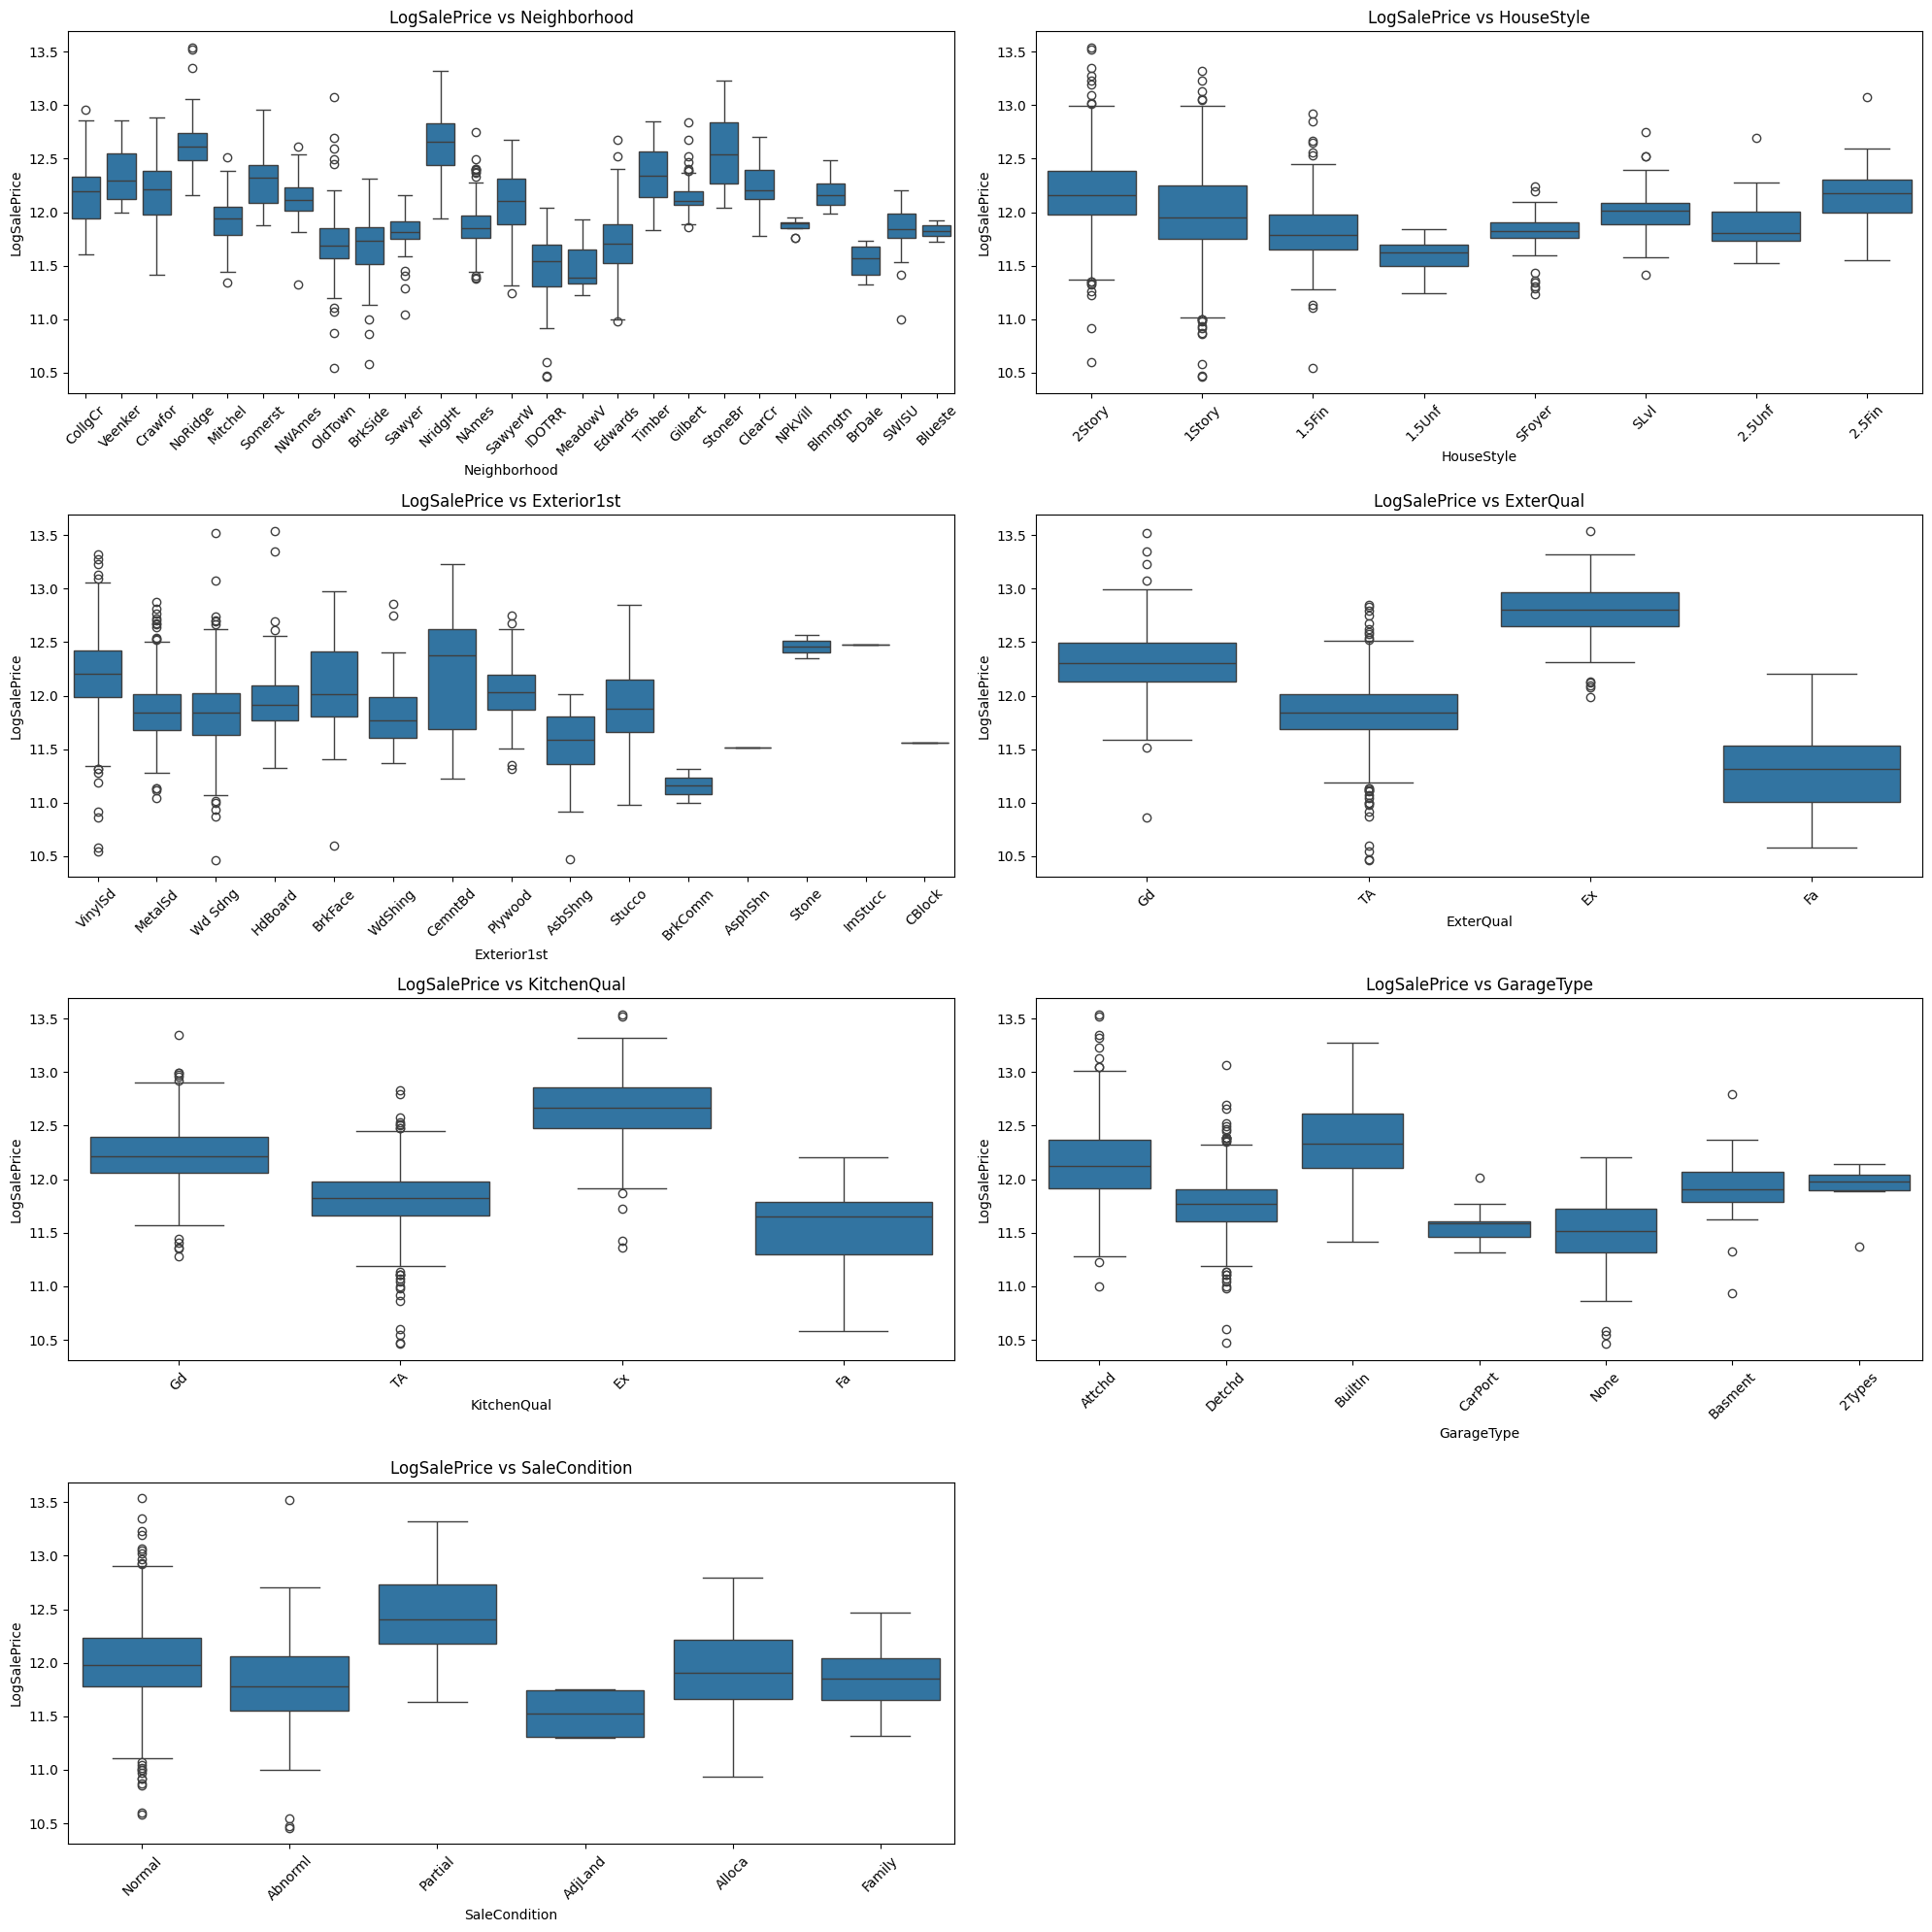

In [10]:
print("5. Analyse des principales variables catégorielles avec LogSalePrice")

cat_vars = ['Neighborhood', 'HouseStyle', 'Exterior1st', 'ExterQual', 
            'KitchenQual', 'GarageType', 'SaleCondition']

plt.figure(figsize=(20, 20))
for i, var in enumerate(cat_vars):
    plt.subplot(4, 2, i+1)
    sns.boxplot(x=df[var], y=df['LogSalePrice'])
    plt.title(f'LogSalePrice vs {var}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 1.6.1 Observations sur les variables catégorielles

- La variable `Neighborhood` a un impact très net sur LogSalePrice. Certains quartiers comme 'NridgHt', 'StoneBr', 'NoRidge' affichent des médianes de prix log significativement plus élevées, tandis que d'autres comme 'IDOTRR' ou 'BrDale' se situent clairement en bas de l’échelle. Cela suggère une forte segmentation du marché immobilier en fonction de la localisation.

- `ExterQual` montre une progression claire et ordonnée : plus la qualité extérieure est jugée bonne (`Fa`, `TA`, `Gd`, `Ex`), plus le prix log moyen augmente. Cela indique qu’un encodage ordinal est justifié pour cette variable.

- Même logique pour `KitchenQual`, avec des écarts visibles entre chaque niveau. Les maisons avec une cuisine de qualité excellente (`Ex`) sont celles qui atteignent les prix les plus élevés, tandis que celles avec une qualité faible (`Fa`) restent en bas du spectre.

- `GarageType` montre une hiérarchie intéressante : les garages intégrés au bâtiment (`BuiltIn`, `Attchd`) sont associés à des prix log supérieurs à ceux avec des garages détachés ou absents (`Detchd`, `None`).

- `HouseStyle` révèle des tendances cohérentes mais moins tranchées. Certaines configurations (comme '2Story' ou '1.5Fin') semblent plus valorisées que d'autres, mais les distributions sont plus larges et se recoupent.

- Enfin, `SaleCondition` distingue les ventes standards (`Normal`, `Partial`) des cas particuliers (`Abnorml`, `Family`, `AdjLand`), qui affichent en moyenne des prix inférieurs. Cela traduit une dépréciation potentielle dans les ventes atypiques.

➡️ Ces analyses guideront l’encodage des variables : certaines seront traitées comme ordinales (`ExterQual`, `KitchenQual`), d’autres via one-hot encoding (`Neighborhood`, `GarageType`, `SaleCondition`) pour capturer les effets spécifiques de chaque modalité.


## 2.1 Sélection des variables

À partir des analyses précédentes, nous avons sélectionné :
- Des variables numériques très corrélées avec le prix (surface, qualité, nombre de garages, etc.),
- Deux variables de qualité ordinale (`ExterQual` et `KitchenQual`) pour encodage par score,
- Trois variables nominales (`Neighborhood`, `GarageType`, `SaleCondition`) pour encodage one-hot.

Nous allons maintenant préparer les données pour l'entraînement du modèle.


In [11]:
# Variables numériques fortement corrélées avec LogSalePrice
num_vars = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 
            'TotalBsmtSF', '1stFlrSF', 'FullBath', 'YearBuilt']

# Variables catégorielles à encoder
cat_vars_ordinal = ['ExterQual', 'KitchenQual']  # Ordre de qualité
cat_vars_nominal = ['Neighborhood', 'GarageType', 'SaleCondition']  # Effets de groupe

# Cible
target = 'LogSalePrice'


## 2.2 Encodage des variables catégorielles

Les variables ordinales `ExterQual` et `KitchenQual` sont encodées manuellement à l’aide d’un dictionnaire qui reflète la hiérarchie de qualité.

Les variables nominales sans ordre sont encodées par one-hot encoding (`get_dummies`), ce qui permet au modèle de traiter chaque modalité comme une variable binaire.


In [12]:
# Encodage ordinal
qual_mapping = {
    'Ex': 5,
    'Gd': 4,
    'TA': 3,
    'Fa': 2,
    'Po': 1,
    'None': 0
}

for col in cat_vars_ordinal:
    df[col] = df[col].map(qual_mapping)


# One-hot encoding
df_encoded = pd.get_dummies(df[num_vars + cat_vars_ordinal + cat_vars_nominal], drop_first=True)


## 2.3 Division du jeu de données

Le jeu de données est divisé en deux parties :
- 80 % pour l’entraînement (`X_train`, `y_train`),
- 20 % pour la validation (`X_val`, `y_val`).

Cela permet d’évaluer les performances du modèle sur des données qu’il n’a jamais vues.


In [13]:
from sklearn.model_selection import train_test_split

X = df_encoded
y = df[target]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


## 2.4 Modèle baseline : régression linéaire

Nous entraînons un premier modèle de régression linéaire classique.

Les métriques utilisées pour l’évaluer sont :
- Le **R² score**, qui mesure la proportion de variance expliquée (plus c’est proche de 1, mieux c’est),
- La **RMSE** (Root Mean Squared Error), qui donne une idée de l’erreur moyenne de prédiction, exprimée ici en unité logarithmique.

Ces résultats serviront de référence pour améliorer les performances dans les prochaines itérations du projet.


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

print("R² score :", r2_score(y_val, y_pred))
print("RMSE :", np.sqrt(mean_squared_error(y_val, y_pred)))


R² score : 0.8696370681604237
RMSE : 0.1559716499430195


## 2.5 Modèle OLS avec Statsmodels

Le modèle de régression est également entraîné avec la bibliothèque `statsmodels`, qui fournit un résumé statistique complet.

Ce résumé inclut :
- Les coefficients des variables,
- Leur significativité statistique (valeurs p),
- Les intervalles de confiance,
- Des indicateurs globaux du modèle (R², F-statistic, etc.).

Cela permet de valider l’intérêt de chaque variable dans une optique plus analytique.


In [15]:
import statsmodels.api as sm

# Ajout de la constante et conversion en float
X_sm = sm.add_constant(X_train).astype(float)
y_sm = y_train.astype(float)

# Modèle OLS
ols_model = sm.OLS(y_sm, X_sm)
ols_results = ols_model.fit()

# Résumé
print(ols_results.summary())


                            OLS Regression Results                            
Dep. Variable:           LogSalePrice   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     145.0
Date:                Mon, 19 May 2025   Prob (F-statistic):               0.00
Time:                        22:56:16   Log-Likelihood:                 561.86
No. Observations:                1168   AIC:                            -1032.
Df Residuals:                    1122   BIC:                            -798.8
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     7.99

## 2.6 Analyse des résidus et diagnostics du modèle

Les graphiques suivants permettent d’évaluer la validité des hypothèses de la régression linéaire :

1. **Résidus vs valeurs ajustées** : vérifie l’homoscédasticité (variance constante des erreurs).
2. **Q-Q Plot** : évalue si les résidus suivent une loi normale.
3. **Scale-Location** : vérifie si la dispersion des résidus est stable sur toute la plage des valeurs prédites.
4. **Résidus vs Leverage** : identifie les points influents (via la distance de Cook).

Ces graphiques sont utiles pour détecter :
- Des outliers,
- Des erreurs non normales,
- Des problèmes de modélisation locale.

➡️ Ces éléments guideront d’éventuelles transformations, exclusions ou choix de modèles plus robustes.


In [ ]:
def graph(formula, x_range, label=None):
    x = x_range
    y = formula(x)
    plt.plot(x, y, label=label, lw=1, ls='--', color='red')






In [18]:
def diagnostic_plots(X, y, model_fit=None):
    """
    Produit les 4 graphiques de diagnostic pour un modèle OLS.
    """

    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    import pandas as pd
    from statsmodels.graphics.gofplots import ProbPlot
    import statsmodels.api as sm

    if model_fit is None:
        model_fit = sm.OLS(y, sm.add_constant(X)).fit()

    # Réinitialisation des index
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)
    dataframe = pd.concat([X, y], axis=1)

    model_fitted_y = model_fit.fittedvalues
    model_residuals = model_fit.resid
    model_norm_residuals = model_fit.get_influence().resid_studentized_internal
    model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))
    model_abs_resid = np.abs(model_residuals)
    model_leverage = model_fit.get_influence().hat_matrix_diag
    model_cooks = model_fit.get_influence().cooks_distance[0]

    # Résidus vs valeurs ajustées
    plt.figure()
    sns.residplot(x=model_fitted_y, y=model_residuals,
                  lowess=True,
                  scatter_kws={'alpha': 0.5},
                  line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
    plt.title('Residuals vs Fitted')
    plt.xlabel('Fitted values')
    plt.ylabel('Residuals')

    top3 = np.argsort(model_abs_resid)[-3:]
    for i in top3:
        plt.annotate(i, xy=(model_fitted_y.iloc[i], model_residuals.iloc[i]))

    # Q-Q Plot
    plt.figure()
    qq = ProbPlot(model_norm_residuals)
    qq.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)
    plt.title('Normal Q-Q')
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Standardized Residuals')

    top3 = np.argsort(np.abs(model_norm_residuals))[-3:]
    for i in top3:
        plt.annotate(i, xy=(qq.theoretical_quantiles[i], model_norm_residuals[i]))

    # Scale-Location
    plt.figure()
    plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
    sns.regplot(x=model_fitted_y, y=model_norm_residuals_abs_sqrt,
                scatter=False, lowess=True,
                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
    plt.title('Scale-Location')
    plt.xlabel('Fitted values')
    plt.ylabel('√|Standardized Residuals|')

    top3 = np.argsort(model_norm_residuals_abs_sqrt)[-3:]
    for i in top3:
        plt.annotate(i, xy=(model_fitted_y.iloc[i], model_norm_residuals_abs_sqrt[i]))

    # Residuals vs Leverage
    plt.figure()
    plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
    sns.regplot(x=model_leverage, y=model_norm_residuals,
                scatter=False, lowess=True,
                line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
    plt.title('Residuals vs Leverage')
    plt.xlabel('Leverage')
    plt.ylabel('Standardized Residuals')
    plt.xlim(0, max(model_leverage)+0.01)
    plt.ylim(-3, 5)

    top3 = np.argsort(model_cooks)[-3:]
    for i in top3:
        plt.annotate(i, xy=(model_leverage[i], model_norm_residuals[i]))

    # Courbes de Cook
    p = len(model_fit.params)
    graph(lambda x: np.sqrt((0.5 * p * (1 - x)) / x),
          np.linspace(0.001, max(model_leverage), 50),
          'Cook\'s distance 0.5')
    graph(lambda x: np.sqrt((1 * p * (1 - x)) / x),
          np.linspace(0.001, max(model_leverage), 50),
          'Cook\'s distance 1.0')
    plt.legend(loc='upper right')


c:\Users\ludom\Desktop\HEG\6eSemestre\ProjetDataScience\Projet\OverfittingRepo\.venv\Lib\site-packages\statsmodels\graphics\gofplots.py:1041: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


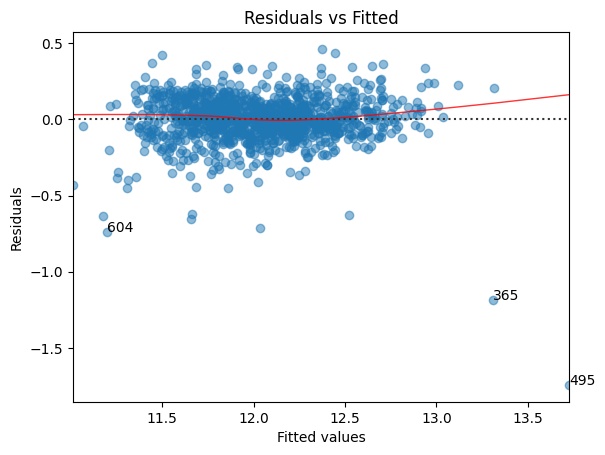

<Figure size 640x480 with 0 Axes>

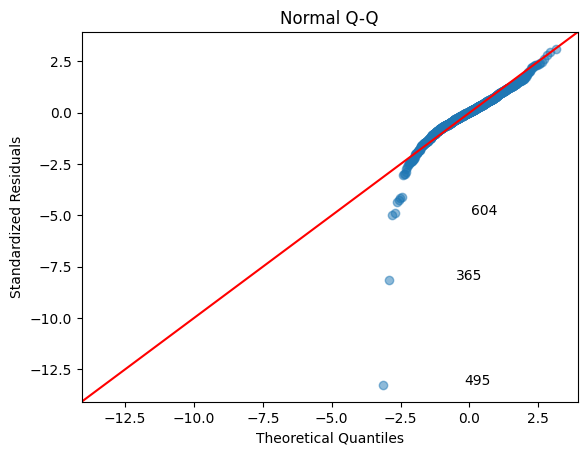

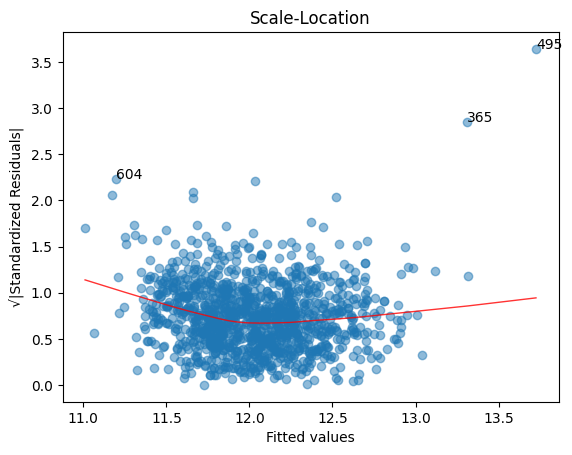

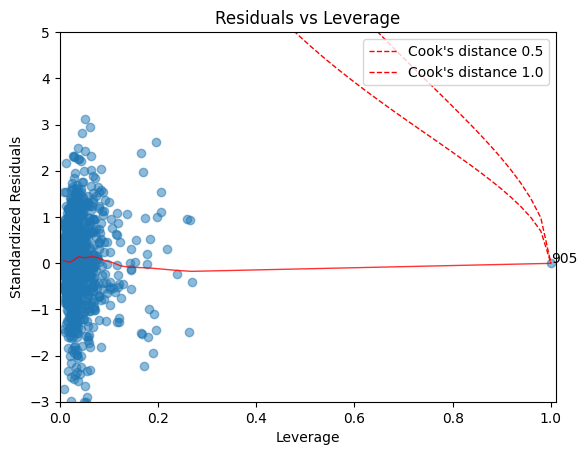

In [19]:
diagnostic_plots(X_sm, y_train, model_fit=ols_results)


## 3. Interprétation du modèle linéaire et perspectives

### 3.1 Résumé des résultats

Nous avons construit un premier modèle de régression linéaire multiple pour prédire `LogSalePrice`, une version transformée du prix de vente d’une maison. Ce modèle repose sur un ensemble restreint mais pertinent de variables numériques et catégorielles.

Les résultats du modèle OLS montrent une **très bonne performance globale** :

- **R² = 0.853** : le modèle explique plus de 85 % de la variance du prix de vente, ce qui est élevé pour un modèle simple.
- Plusieurs variables sont **statistiquement significatives** (p-value < 0.05), notamment :
  - `OverallQual` (qualité globale de la maison),
  - `GrLivArea` (surface habitable),
  - `GarageCars` (nombre de places dans le garage),
  - `KitchenQual` (qualité de la cuisine),
  - `YearBuilt` (année de construction),
  - `TotalBsmtSF` (surface du sous-sol).

Ces résultats confirment que **la perception de qualité, l’espace disponible et l’ancienneté du bien sont des facteurs clés** dans la valorisation immobilière.

En revanche, certaines variables comme `GarageArea`, `1stFlrSF`, ou `FullBath` ne sont pas significatives ici, sans doute à cause d’un **recouvrement d’information (multicolinéarité)** entre des variables très proches. Cela ouvre la voie à une optimisation du modèle par **sélection automatique de variables** ou **régularisation (Ridge/Lasso)**.

---

### 3.2 Analyse des résidus

L’analyse graphique des résidus montre :

- Une bonne dispersion autour de 0 (résidus non biaisés),
- Une variance assez constante (homoscédasticité),
- Une normalité satisfaisante à l’exception de quelques valeurs extrêmes,
- Quelques **points influents** identifiés (par ex. l’observation 905), mais aucun ne remet en cause la stabilité globale du modèle.

➡️ Ces résultats indiquent que les hypothèses de base de la régression linéaire sont **globalement respectées**, ce qui valide la cohérence statistique du modèle.

---

### 3.3 Intérêt métier pour la plateforme immobilière

Pour notre plateforme en ligne, ce modèle représente une **première étape solide** dans le développement d’un système automatisé d’estimation immobilière.

**Bénéfices directs pour le métier** :
- Fournir aux propriétaires une **estimation rapide et fiable** de leur bien dès la saisie de ses caractéristiques,
- **Améliorer la transparence** et la confiance dans le processus de mise en vente,
- Réduire les écarts entre le prix affiché et le prix réellement vendu,
- Permettre à l’agence de **préqualifier les annonces** et optimiser la stratégie de publication.

Ce modèle peut donc être **intégré dans un formulaire en ligne** où le propriétaire renseigne les données clés (qualité, surface, quartier, etc.) et reçoit immédiatement une estimation justifiée par des données historiques.

---

### 3.4 Perspectives et prochaines étapes

Pour aller plus loin, plusieurs axes d’amélioration sont envisageables :

1. **Nettoyage des données** :
   - Identifier et gérer les **outliers influents** (ex. : observations 365, 495, 905),
   - Revoir certaines variables très corrélées entre elles (multicolinéarité).

2. **Amélioration du modèle** :
   - Tester des **modèles régularisés** comme Ridge ou Lasso pour affiner la sélection des variables,
   - Passer à des **modèles non linéaires** (Random Forest, XGBoost) pour capturer des interactions plus complexes.

3. **Validation croisée** :
   - Mettre en place une **cross-validation K-Fold** pour évaluer la stabilité du modèle.

4. **Élargissement des données** :
   - Ajouter de nouvelles features (ex : distance au centre-ville, orientation, proximité des écoles),
   - Intégrer des **tendances temporelles** (année de vente, saisonnalité).

5. **Interface utilisateur** :
   - Concevoir un **formulaire web connecté au modèle** pour déployer l’outil sur la plateforme en ligne.

---

### 3.5 Conclusion

Ce modèle linéaire de base offre une **fondation fiable et interprétable** pour l’estimation immobilière automatisée. Il montre que des variables simples, bien sélectionnées, permettent déjà de prédire le prix avec une bonne précision. Pour une agence immobilière, c’est une étape stratégique qui peut transformer l’expérience utilisateur tout en améliorant l'efficacité commerciale.

La prochaine phase du projet consistera à **consolider la robustesse du modèle et enrichir sa sophistication**, pour fournir un outil à la fois précis, scalable et exploitable en production.


# 1.7 Synthèse de la phase d'idéation (à supprimer)

## Résumé de nos observations

### Distribution de SalePrice
- La variable SalePrice présente une asymétrie à droite (skewness positive) : la majorité des prix sont concentrés autour de 120 000 à 200 000 dollars, tandis qu’un petit nombre de maisons très chères tire la distribution vers la droite.
- Présence d'outliers pour les maisons très chères.
- Transformation logarithmique envisagée pour stabiliser la variance.

### Variables numériques importantes
- **OverallQual** (qualité globale) est la variable la plus corrélée à `SalePrice`.
- **GrLivArea** (surface habitable hors sous-sol) suit également.
- **GarageCars**, **GarageArea**, **TotalBsmtSF**, **1stFlrSF**, **FullBath** sont des variables très pertinentes.
- **YearBuilt** et **YearRemodAdd** confirment l'importance de l'ancienneté.

### Variables catégorielles importantes
- **Neighborhood** influence fortement les prix selon le quartier.
- **ExterQual** et **KitchenQual** (qualité extérieure et cuisine) sont liées à des écarts marqués de prix.
- **GarageType** et **SaleCondition** produisent également des effets sur le prix.

## Conséquences pour le modèle baseline
- Sélection de quelques variables numériques et catégorielles pertinentes.
- Nécessité de traiter les variables manquantes et d'encoder les catégories.
- Possible besoin de transformer `SalePrice` en log pour de meilleures performances de modèle.
